Homework 2: https://www.work.caltech.edu/homework/hw2.pdf

Solution key 2: https://www.work.caltech.edu/homework/hw2_sol.pdf

# Homework 2


- Student Name: Nguyễn Tấn Lộc
- Student ID: 21127099

---

## References:

Lecture 03 -The Linear Model I: https://youtu.be/FIbVs5GbBlQ

Lecture 04 - Error and Noise: https://youtu.be/L_0efNkdGMc

---

### Import necessary libraries

In [56]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #Question 8 - 9 - 10
from sklearn.preprocessing import PolynomialFeatures #Question 8 - 9 - 10

##  Hoeffding Inequality

Run a computer simulation for flipping 1,000 virtual fair coins. Flip each coin independently 10 times. Focus on 3 coins as follows: $c_1$ is the first coin flipped, $c_{rand}$ is a
coin chosen randomly from the 1,000, and $c_{min}$ is the coin which had the minimum
frequency of heads (pick the earlier one in case of a tie). Let $v_1$, $v_{rand}$, and $v_{min}$ be
the fraction of heads obtained for the 3 respective coins out of the 10 tosses.

Run the experiment 100,000 times in order to get a full distribution of $v_1$, $v_{rand}$, and $v_{min}$ (note that $v_{rand}$ and $v_{min}$ will change from run to run).

# 1 - 2

### 1. The average value of νmin is closest to:

[a] 0

[b] 0.01

[c] 0.1

[d] 0.5

[e] 0.67

## 1. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Code Python Below)

<font color='yellow'><b>Therefore, the closet answer is: [b] 0.01.</b></font>


Run 1 time

In [57]:
outcomes = np.random.choice(['HEAD', 'TAIL'], size=(1000, 10))
# for i in range(1000):
#     print(f'c{i + 1}: {outcomes[i]}')
outcomes_numeric = np.where(outcomes == 'HEAD', 1, 0) # 1 for HEAD, 0 for TAIL

# c1 is the first coin flipped
c1=outcomes[0]
c1_numeric = outcomes_numeric[0]
v1=c1_numeric.mean()

print(f'c1: {c1}')
print(f'v1: {v1}')

#c_rand is a coin chosen randomly from the 1,000
random_row_index = np.random.randint(0, 1000) 
c_rand = outcomes[random_row_index]  
c_rand_numeric = outcomes_numeric[random_row_index] 
v_rand = c_rand_numeric.mean()  

print(f'c_rand: {c_rand}')
print(f'v_rand: {v_rand}')

#c_min is the coin which had the minimum frequency of heads (pick the earlier one in case of a tie)
v_min = 1.0
c_min = None

for i in range(1000):
    current_coin = outcomes[i]
    current_coin_numeric = outcomes_numeric[i]
    current_mean = current_coin_numeric.mean()

    if current_mean < v_min:
        v_min = current_mean
        c_min = current_coin

print(f'c_min: {c_min}')
print(f'v_min: {v_min}')

c1: ['HEAD' 'TAIL' 'HEAD' 'HEAD' 'HEAD' 'HEAD' 'HEAD' 'HEAD' 'HEAD' 'TAIL']
v1: 0.8
c_rand: ['HEAD' 'TAIL' 'TAIL' 'HEAD' 'TAIL' 'HEAD' 'TAIL' 'TAIL' 'HEAD' 'TAIL']
v_rand: 0.4
c_min: ['TAIL' 'TAIL' 'TAIL' 'TAIL' 'TAIL' 'HEAD' 'TAIL' 'TAIL' 'TAIL' 'TAIL']
v_min: 0.1


Run 100000 times but so long

In [58]:
v1_values = []
v_rand_values = []
v_min_values = []
# Perform the experiment 100,000 times
for _ in range(100000):
    outcomes = np.random.choice(['HEAD', 'TAIL'], size=(1000, 10))
    outcomes_numeric = np.where(outcomes == 'HEAD', 1, 0)
    
    # Calculate v1
    c1_numeric = outcomes_numeric[0]
    #v1 = c1_numeric.mean()
    v1=sum(c1_numeric)/len(c1_numeric)

    # Calculate v_rand
    random_row_index = np.random.randint(0, 1000)
    c_rand_numeric = outcomes_numeric[random_row_index]
    # v_rand = c_rand_numeric.mean()
    v_rand=sum(c_rand_numeric)/len(c_rand_numeric)
    # Calculate v_min
    min_mean = 1.0
    c_min = None
    for i in range(1000):
        current_coin_numeric = outcomes_numeric[i]
        # current_mean = current_coin_numeric.mean()
        current_mean=sum(current_coin_numeric)/len(current_coin_numeric)
        if current_mean < min_mean:
            min_mean = current_mean
            c_min = outcomes[i]

    v_min = min_mean
    v1_values.append(v1)
    v_rand_values.append(v_rand)
    v_min_values.append(v_min)

# Calculate the average of v1, v_rand, v_min over all the experiments
# average_v1 = np.mean(v1_values)
# average_v_rand = np.mean(v_rand_values)
# average_v_min = np.mean(v_min_values)
average_v1 = sum(v1_values)/len(v1_values)
average_v_rand = sum(v_rand_values)/len(v_rand_values)
average_v_min = sum(v_min_values)/len(v_min_values)

print(f'Average v1: {average_v1}')
print(f'Average v_rand: {average_v_rand}')
print(f'Average v_min: {average_v_min}')

Average v1: 0.49946400000000574
Average v_rand: 0.5001280000000023
Average v_min: 0.0374409999999769


Run 100000 times but faster

The reason is in the code below I use count of Head for all outcomes instead of array of outcomes

In [59]:
v1_values = []
v_rand_values = []
v_min_values = []
# Perform the experiment 100,000 times
for _ in range(100000):
    # outcomes = np.random.choice(['HEAD', 'TAIL'], size=(1000, 10))
    # outcomes_numeric = np.where(outcomes == 'HEAD', 1, 0)
    outcomes=np.random.choice(2,size=(1000,10))
    headsCnt=np.sum(outcomes,axis=1)

    # Calculate v1
    c1_numeric = headsCnt[0]
    v1=c1_numeric/10

    # Calculate v_rand
    random_row_index = np.random.randint(0, 1000)
    c_rand_numeric = headsCnt[random_row_index]
    v_rand=c_rand_numeric/10
    # Calculate v_min
    c_min = np.min(headsCnt)
    v_min = c_min/10
    
    v1_values.append(v1)
    v_rand_values.append(v_rand)
    v_min_values.append(v_min)

# Calculate the average of v1, v_rand, v_min over all the experiments
average_v1 = sum(v1_values)/100000
average_v_rand = sum(v_rand_values)/100000
average_v_min = sum(v_min_values)/100000

print(f'Average v1: {average_v1}')
print(f'Average v_rand: {average_v_rand}')
print(f'Average v_min: {average_v_min}')

Average v1: 0.4999790000000004
Average v_rand: 0.49982499999999874
Average v_min: 0.03779799999997658


*The value of $v_{min}$ tends to be close to zero. This indicates that when selecting the coin with the minimum frequency of heads from among the 1000 coins and repeating this process over 100,000 runs, the minimum value is frequently 0, which corresponds to having no heads in 10 tosses.*

### 2. Which coin(s) has a distribution of ν that satisfies the (single-bin) Hoeffding Inequality?

[a] $c_1$ only

[b] $c_{rand}$ only

[c] $c_{min}$ only

[d] $c_1$ and $c_{rand}$

[e] $c_{min}$ and $c_{rand}$

## 2. Explanation and Answer
<u><i><b>Explain</b></i></u>:

I have learnt Hoeffding's inequality $^{1}$ $^{2}$:

$${\displaystyle \operatorname {P} \left(|E_{in}(h)-E_{out}(h)|>\varepsilon\right)\leq 2\exp \left(-2\varepsilon ^{2}n\right)   with \space (\varepsilon > 0).}$$

$$E_{in}(h)=\frac {1}{N}\sum_{i = 1}^{N} [[h(xi)≠f(xi)]], E_{out}=P(h(x)≠f(x))$$

I consulted Law of Large Number $^{3}$ to find $E_{out}(h)$


(Code Python Below)

References:
1. Hoeffding's inequality from Wikipedia: https://en.wikipedia.org/wiki/Hoeffding%27s_inequality
2. Hoeffding's inequality and learning from Mathematics: https://math.stackexchange.com/questions/2097429/hoeffdings-inequality-and-learning
3. Law of Large Number from Youtube: https://youtu.be/y3lrU9Hsicc

<font color='yellow'><b>Therefore, the correct answer is: [d] [d] $c_1$ and $c_{rand}$.</b></font>


1. Use Hoeffding's inequality

In [60]:
# EPSILON= np.random.rand() #random in [0,1]
epsilon =0.4
outcomes=np.random.choice(2, size = (1000,10))

e_in = np.empty((0, 3))
for i in range(1000):
    row = np.array([v1_values[i], v_rand_values[i], v_min_values[i]])
    e_in = np.vstack((e_in, row))

e_out=0
for i in range(1000):
    e_out+=float(1/1000)*outcomes[i].mean()

e_out=round(e_out,1)
print(e_in)
print(e_out)

[[0.9 0.6 0. ]
 [0.8 0.5 0.1]
 [0.5 0.5 0. ]
 ...
 [0.6 0.7 0.1]
 [0.5 0.5 0.1]
 [0.7 0.5 0.1]]
0.5


I got the reference from the site below but I don't understand how to choose the right EPSILON value. When I choose a small EPSILON value (0.1), I apply Hoeffding's inequality and all the coins are True. But when I choose a big EPSILON value (0.3), I apply Hoeffding's inequality and the result is different from the old result. So I think I will show the distribution and draw conclusions. Thank you Teacher.

https://notebook.community/akhileshh/lfd-caltech/homework02

In [61]:
def check_deviation(E_IN, E_OUT, EPSILON):
    return np.fabs(E_IN - E_OUT) > EPSILON

vectorized_check_deviation = np.vectorize(check_deviation) 
hoeffding_check = (np.mean((vectorized_check_deviation(e_in, e_out, epsilon)), axis=0)) <= 2 * np.exp(-2 * epsilon*epsilon * 10)
print(f'v1', hoeffding_check[0])
print(f'v_rand', hoeffding_check[1])
print(f'v_min', hoeffding_check[2])

v1 True
v_rand True
v_min False


$ \to $ I use way 2

2. Use distribution

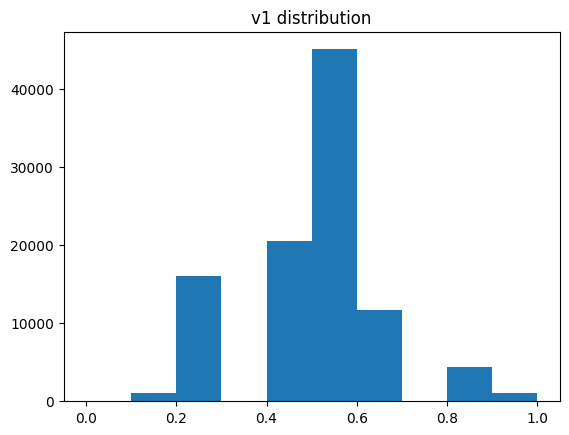

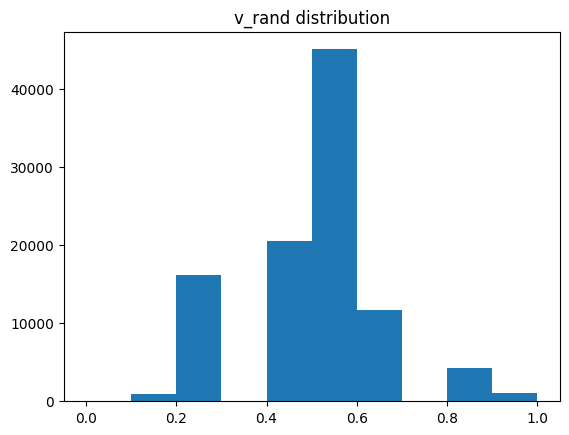

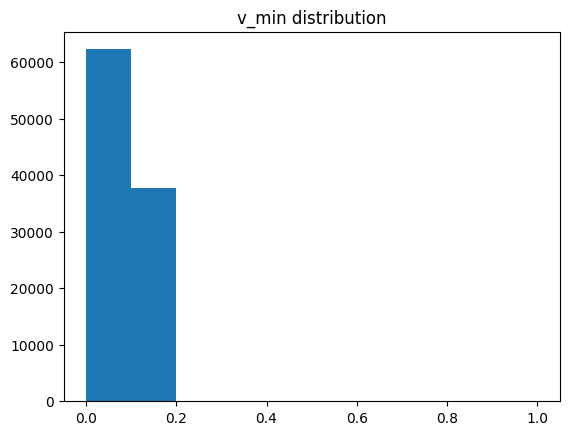

In [62]:
num_runs = 100000
num_coins = 1000
num_flips = 10

v1_values_np = np.zeros(num_runs)
v_rand_values_np = np.zeros(num_runs)
v_min_values_np = np.zeros(num_runs)

for i in range(num_runs):
    coins = np.random.randint(0, 2, size=(num_coins, num_flips))
    c1 = coins[0]
    random_index = np.random.randint(0, num_coins)
    c_rand = coins[random_index]
    sum_coins = np.sum(coins, axis=1)
    c_min = coins[np.argmin(sum_coins)]

    # v1_values_np[i] = np.mean(c1)
    # v_rand_values_np[i] = np.mean(c_rand)
    # v_min_values_np[i] = np.mean(c_min)
    v1_values_np[i] = sum(c1)/len(c1)
    v_rand_values_np[i] = sum(c_rand)/len(c_rand)
    v_min_values_np[i] = sum(c_min)/len(c_min)

def plot_histogram(data, title):
    plt.hist(data, bins=np.linspace(0, 1, 11))
    plt.title(title)
    plt.show()

plot_histogram(v1_values_np, "v1 distribution")
plot_histogram(v_rand_values_np, "v_rand distribution")
plot_histogram(v_min_values_np, "v_min distribution")

*In probability theory, Hoeffding's inequality provides an upper bound on the probability that the sum of bounded independent random variables deviates from its expected value by more than a certain amount $^{1}$. For this problem, since it follows a binomial distribution which is a condition for using Hoeffding's inequality, v1 and v_rand choose coin base on random but v_min chooses coin bases on dataset, looking at the distributions of the three charts v1, v_rand, and v_min, we can observe that only v_min is significantly skewed to the left `(which means v_min chart skews too far to its expected value (mean): 0.5)`. Therefore, we can conclude that v1 and v_rand satisfy the (single-bin) Hoeffding Inequality.*

## Error and Noise

Consider the bin model for a hypothesis $h$ that makes an error with probability $µ$ in
approximating a deterministic target function $f$ (both h and $f$ are binary functions).
If we use the same $h$ to approximate a noisy version of $f$ given by:

$$
P(y|x) = 
\begin{cases} 
\lambda & \text{if } y=f(x) \\
1-\lambda & \text{if } y \neq f(x)
\end{cases}
$$


# 3 - 4

### 3. What is the probability of error that h makes in approximating y? <i>Hint: Two wrongs can make a right!</i>


[a] $µ$

[b] $λ$

[c] $1-µ$

[d] $(1 − λ) ∗ µ + λ ∗ (1 − µ)$

[e] $(1 − λ) ∗ (1 − µ) + λ ∗ µ$

## 3. Explanation and Answer
<u><i><b>Explain</b></i></u>:

There are `two wrongs can make a right`:

1. The probability of error by hypothesis $h$ is $\mu$, while $y$ is accurate, meaning $y = f(x)$, with a probability of $\lambda$.
2. There is no error made by hypothesis $h$ with a probability of $(1 - \mu)$, but $y$ has an incorrect value, meaning $y \neq f(x)$, with a probability of $(1 - \lambda)$.

$$\to P(\mathrm{error}) = \lambda * \mu + (1 - \lambda) * (1 - \mu)$$

<font color='yellow'><b>Therefore, the correct answer is: [e] $(1 − λ) ∗ (1 − µ) + λ ∗ µ$.</b></font>

### 4. At what value of λ will the performance of h be independent of µ?

Compute the probability that ν = 0. The closest answer is (‘closest answer’ means: `|your answer−given option|` is closest to 0):

[a] $0$

[b] $0.5$

[c] $1 \sqrt 2$

[d] $1$

[e] $No \space values \space of \spaceλ$

## 4. Explanation and Answer
<u><i><b>Explain</b></i></u>:

We have:

$\begin{align}
P(\text{error}) &= \lambda * \mu + (1-\lambda)* (1-\mu) = \lambda * \mu + 1-\lambda-\mu+\lambda* \mu = 1 - \lambda + \mu * (2\lambda-1)
\end{align}$

We choose each answer to fill in $ \lambda $, after that we have:

[a] $P(\text{error})= 1 - \mu$

[b] $P(\text{error})= 0.5$

[c] $P(\text{error})= 1 - 1 \sqrt 2 + \mu * (2 \sqrt 2 -1)$

[d] $P(\text{error})= \mu$

We can see that only answer [b] is True: $P(\mathrm{error})$ becomes independent of $\mu$.

<font color='yellow'><b>Therefore, the closet answer is: [b] $0.5$.</b></font>

## Linear Regression

---
*(More Information about Linear Regression is in the HW2)*

# 5 - 7.

### 5. Take N = 100. 
Use Linear Regression to find g and evaluate $E_{in}$, the fraction of
in-sample points which got classified incorrectly. Repeat the experiment 1000
times and take the average (keep the $g$’s as they will be used again in Problem
6). Which of the following values is closest to the average $E_{in}$? (Closest is the
option that makes the expression `your answer − given option` closest to 0. Use
this definition of closest here and throughout.)

[a] $0$

[b] $0.001$

[c] $0.01$

[d] $0.1$

[e] $0.5$


### 6.Now, generate 1000 fresh points.
And use them to estimate the out-of-sample
error $E_{out}$ of g that you got in Problem 5 (number of misclassified out-of-sample
points / total number of out-of-sample points). Again, run the experiment 1000
times and take the average. Which value is closest to the average $E_{out}$?

[a] $0$

[b] $0.001$

[c] $0.01$

[d] $0.1$

[e] $0.5$

## 5. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Code Python below)

<font color='yellow'><b>Therefore, the closet answer is: [c] $0.01$.</b></font>

## 6. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Code Python below)

<font color='yellow'><b>Therefore, the closet answer is: [c] $0.01$.</b></font>

In [63]:
def generate_target_function():
    """
    Generates a random target function in the form of a line.
    
    Returns
    -------
    target_function : numpy array, shape (3, )
        The vector representing the parameters of the target function (ax + by + c = 0).
    """
    # Generate two random points to define the target line
    points = np.random.uniform(-1, 1, (2, 2))
    x1, y1, x2, y2 = points[0, 0], points[0, 1], points[1, 0], points[1, 1]
    a = y2 - y1
    b = x1 - x2
    c = x2 * y1 - x1 * y2
    return np.array([c, a, b])

def generate_data_set(target_function, N):
    """
    Generates a data set using the provided target function.
    
    Parameters
    ----------
    target_function : numpy array, shape (3, )
        The vector representing the parameters of the target function (ax + by + c = 0).
    N : int
        The number of data points to generate.
    
    Returns
    -------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column is all ones.
    y : numpy array, shape (N, )
        The vector of outputs (+1 or -1) based on the target function.
    """
    X = np.random.uniform(-1, 1, (N, 2))
    X_regression = np.column_stack((np.ones(N), X[:, 0], X[:, 1]))
    y = np.sign(np.dot(X_regression, target_function))
    return X_regression, y

def linear_regression(X, y):
    """
    Performs linear regression to find a hypothesis function g.

    Parameters
    ----------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column is all ones.
    y : numpy array, shape (N, )
        The vector of outputs (+1 or -1).

    Returns
    -------
    w : numpy array, shape (3, )
        The vector representing the parameters of the hypothesis function g.
    """
    w = np.dot(np.linalg.pinv(X), y)
    return w

def calculate_error(X, y, w):
    """
    Calculates the classification error given the input, output, and hypothesis parameters.

    Parameters
    ----------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column is all ones.
    y : numpy array, shape (N, )
        The vector of true outputs (+1 or -1).
    w : numpy array, shape (3, )
        The vector representing the parameters of the hypothesis function.

    Returns
    -------
    error : float
        The classification error (fraction of misclassified points).
    """
    predictions = np.sign(np.dot(X, w))
    misclassified = np.sum(predictions != y)
    error = misclassified / len(y)
    return error

def main(N):
    """
    Main function to run the experiment.

    Parameters
    ----------
    N : int
        The number of data points in the training set.
    """
    num_runs = 1000
    avg_ein = 0.0
    avg_eout = 0.0
    
    for _ in range(num_runs):
        # Generate a random target function
        target_function = generate_target_function()
        
        # Generate training set and run linear regression
        X, y = generate_data_set(target_function, N)
        w = linear_regression(X, y)
        
        # Calculate in-sample error (Ein)
        ein = calculate_error(X, y, w)
        avg_ein += ein

        # Generate out-of-sample set and calculate out-of-sample error (Eout)
        X_out, y_out = generate_data_set(target_function, 1000)
        eout = calculate_error(X_out, y_out, w)
        avg_eout += eout

    avg_ein /= num_runs
    avg_eout /= num_runs

    # Print results
    print("Average Ein:", avg_ein)
    print("Average Eout:", avg_eout)


In [64]:
main(N=100)

Average Ein: 0.039010000000000045
Average Eout: 0.04699899999999994


### 7. Now, take N = 10. 
After finding the weights using Linear Regression, use
them as a vector of initial weights for the Perceptron Learning Algorithm. Run
PLA until it converges to a final vector of weights that completely separates
all the in-sample points. Among the choices below, what is the closest value to
the average number of iterations (over 1000 runs) that PLA takes to converge?
(When implementing PLA, have the algorithm choose a point randomly from
the set of misclassified points at each iteration)

[a] $1$

[b] $15$

[c] $300$

[d] $5000$

[e] $10000$

## 7. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Code Python below)

<font color='yellow'><b>Therefore, the closet answer is: [a] $1$.</b></font>

In [65]:
def run_PLA(X, y, initial_weights):
    """
    Runs Perceptron Learning Algorithm (PLA) with a given initial weight.

    Parameters
    ----------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column is all ones.
    y : numpy array, shape (N, )
        The vector of true outputs (+1 or -1).
    initial_weights : numpy array, shape (3, )
        The vector representing the initial weights.

    Returns
    -------
    final_weights : numpy array, shape (3, )
        The vector representing the final weights after PLA converges.
    num_iterations : int
        The number of iterations PLA took to converge.
    """
    num_iterations = 0
    w = initial_weights.copy()
    N = len(y)
    converged = False
    while not converged:
        misclassified_indices = np.where(np.sign(np.dot(X, w)) != y)[0]

        if len(misclassified_indices) == 0:
            break  # Convergence

        w += y[np.random.choice(misclassified_indices)] * X[np.random.choice(misclassified_indices)]
        num_iterations += 1

    return w, num_iterations

def main(N):
    num_runs = 1000
    avg_iterations = 0.0

    for _ in range(num_runs):
        # Generate a random target function
        target_function = generate_target_function()

        # Generate training set and run linear regression
        X, y = generate_data_set(target_function, N)
        w = linear_regression(X, y)

        # Run Perceptron Learning Algorithm with random misclassified point selection
        final_weights, num_iterations = run_PLA(X, y, w)

        avg_iterations += num_iterations

    avg_iterations/= num_runs

    # Print result
    print("Average number of iterations for PLA to converge:", avg_iterations)

# Run the modified code for Question 7
main(10)


Average number of iterations for PLA to converge: 4.217


## Nonlinear Transformation

---
*(More Information about  Nonlinear Transformation is in the HW2)*

# 8 - 10.

Experiment:

1. Generate the training set:

    - First I set N = 1000, which is the number of data points.
    - Generate random points in the range X = [-1, 1] × [-1, 1] to get the input features (x1, x2).
    - Calculate the target values f(x1, x2) using the target function: f(x1, x2) = sign(x1^2 + x2^2 - 0.6)

2. Introduce simulated noise:

    - Continue I randomly select 10% of the training set (100 points if N = 1000).
    - For these selected points, I flip the sign of the target value to introduce noise.

3. Perform Linear Regression:

    - Apply Linear Regression to the training set to find a `linear boundary` that separates the data points.
    - Since the target function is non-linear, I need to perform a nonlinear transformation of the features to a higher-dimensional space to make the problem linearly separable. I use a feature mapping that transforms (x1, x2) into a higher-dimensional space: 
    
    $$φ(x1, x2) = (1, x_1, x_2, x_1^2, x_2^2, x_1*x_2)$$

4. I continue to perform LR in the higher-dimensional space.

5. I use the `linear boundary` in the step 3 to classify new data points. When making predictions on new data, I apply the same feature transformation (φ) to the input features and use the linear model obtained from the regression to classify the data points.

6. Last I compute $E_{in}$

In-sample error (E_in): 0.12


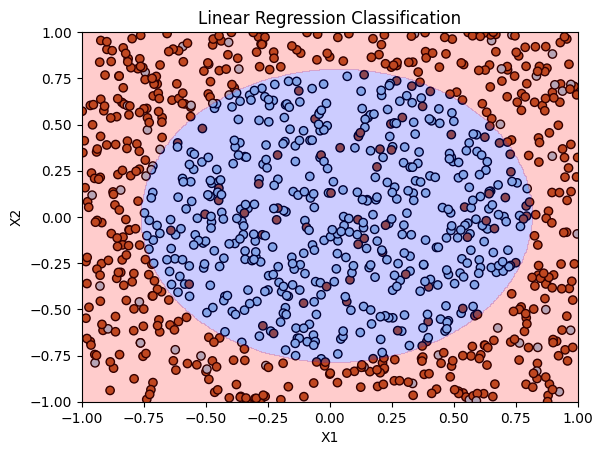

In [66]:
# Set the random seed for reproducibility
np.random.seed(21127099)

# Generate the training set
N = 1000
X = np.random.uniform(-1, 1, (N, 2))
Y = np.sign(X[:, 0]**2 + X[:, 1]**2 - 0.6)

# Introduce simulated noise by flipping the sign of 10% of the points
num_noise_points = int(N * 0.1)
noise_indices = np.random.choice(N, num_noise_points, replace=False)
Y[noise_indices] *= -1

# Perform a non-linear transformation
poly = PolynomialFeatures(degree=2) #I use PolynomialFeatures to map the data to a higher-dimensional space.
X_transformed = poly.fit_transform(X)

# Perform linear regression
model = LinearRegression()
model.fit(X_transformed, Y)

# Calculate in-sample error
predicted_Y = model.predict(X_transformed)
predicted_Y = np.sign(predicted_Y)
in_sample_error = np.mean(predicted_Y != Y)
print(f"In-sample error (E_in): {in_sample_error:.2f}")

# Generate a meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(-1, 1, 400), np.linspace(-1, 1, 400))
mesh_data = np.c_[xx.ravel(), yy.ravel()]
mesh_data_transformed = poly.transform(mesh_data)
Z = model.predict(mesh_data_transformed)
Z = np.sign(Z)

# Create a plot of the classified points with red and blue colors
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), levels=[-1, 0, 1], colors=['b', 'r'], alpha=0.2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear Regression Classification')
plt.show()


### 8. Carry out Linear Regression without transformation, i.e., with feature vector:

$$ (1, x_1,x_2)$$

to find the weight <b>w</b>. What is the closest value to the classification in-sample
error $E_{in}$? (Run the experiment 1000 times and take the average $E_{in}$ to reduce
variation in your results.)

[a] 0

[b] 0.1

[c] 0.3

[d] 0.5

[e] 0.8

## 8. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Code Python below)

<font color='yellow'><b>Therefore, the closet answer is: [d] $0.5$.</b></font>

In [67]:
# Set the random seed for reproducibility
np.random.seed(21127099)

#Generate the training set
num_runs = 1000 # Number of experiments
N_train = 1000 # Number of data points in each experiment

in_sample_errors = [] # List to store in-sample errors from each experiment

#Start
for _ in range(num_runs):
    # Generate the training set with random points
    X_train = np.transpose(np.array([np.ones(N_train), np.random.uniform(-1, 1, size=N_train), np.random.uniform(-1, 1, size=N_train)]))
    y_f_train = np.sign(X_train[:, 1]**2 + X_train[:, 2]**2 - 0.6)

    # Pick 10% random indices and flip the sign
    indices = list(range(N_train))
    np.random.shuffle(indices)
    random_indices = indices[:(N_train // 10)]
    for idx in random_indices:
        y_f_train[idx] = -y_f_train[idx]

    # Perform linear regression
    X_dagger = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T)
    w_lr_train = np.dot(X_dagger, y_f_train)

    # Calculate E_in
    y_lr_train = np.sign(np.dot(X_train, w_lr_train))
    E_in = np.mean(y_lr_train != y_f_train)
    in_sample_errors.append(E_in)

# Calculate the average E_in
average_E_in = np.mean(in_sample_errors)

# Display the result
print("Average In-sample error (E_in):", average_E_in)

Average In-sample error (E_in): 0.507013


### 9. Now, transform the N = 1000 training data into the following nonlinear feature vector:
$$(1; x_1; x_2; x_1x_2; x_1^2; x_2^2)$$

Find the vector $w_2$ that corresponds to the solution of Linear Regression. Which
of the following hypotheses is closest to the one you find? Closest here means
agrees the most with your hypothesis (has the highest probability of agreeing on
a randomly selected point). Average over a few runs to make sure your answer
is stable.

[a] $g(x1; x2) = sign(−1 − 0.05x_1 + 0.08x_2 + 0.13x_1x_2 + 1.5x_1^2 + 1.5x_2^2)$

[b] $g(x1; x2) = sign(−1 − 0.05x_1 + 0.08x_2 + 0.13x_1x_2 + 1.5x_1^2 + 15x_2^2)$

[c] $g(x1; x2) = sign(−1 − 0.05x_1 + 0.08x_2 + 0.13x_1x_2 + 15x_1^2+ 1.5x_2^2)$

[d] $g(x1; x2) = sign(−1 − 1.5x_1 + 0.08x_2 + 0.13x_1x_2 + 0.05x_1^2 + 0.05x_2^2)$

[e] $g(x1; x2) = sign(−1 − 0.05x_1 + 0.08x_2 + 1.5x_1x_2 + 0.15x_1^2 + 0.15x_2^2)$

## 9. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Code Python below)

<font color='yellow'><b>Therefore, the closet answer is: [a] $g(x1; x2) = sign(−1 − 0.05x_1 + 0.08x_2 + 0.13x_1x_2 + 1.5x_1^2 + 1.5x_2^2)$.</b></font>

In [68]:
# Set the random seed for reproducibility
np.random.seed(21127099)

# Number of data points
N_train = 1000

# Generate the training set with random points
X_train = np.transpose(np.array([np.ones(N_train), np.random.uniform(-1, 1, size=N_train), np.random.uniform(-1, 1, size=N_train)]))
y_f_train = np.sign(X_train[:, 1]**2 + X_train[:, 2]**2 - 0.6)

# Define hypothesis functions
def hypothesis_a(x1, x2):
    return np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 1.5*x1**2 + 1.5*x2**2)

def hypothesis_b(x1, x2):
    return np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 1.5*x1**2 + 15*x2**2)

def hypothesis_c(x1, x2):
    return np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 15*x1**2 + 1.5*x2**2)

def hypothesis_d(x1, x2):
    return np.sign(-1 - 1.5*x1 + 0.08*x2 + 0.13*x1*x2 + 0.05*x1**2 + 0.05*x2**2)

def hypothesis_e(x1, x2):
    return np.sign(-1 - 0.05*x1 + 0.08*x2 + 1.5*x1*x2 + 0.15*x1**2 + 0.15*x2**2)

# Function to calculate agreement probability
def agreement_probability(hypothesis, true_labels):
    predicted_labels = hypothesis(X_train[:, 1], X_train[:, 2])
    agreement = np.mean(predicted_labels == true_labels)
    return agreement

# Calculate agreement probability for each hypothesis
agreement_probabilities = {
    '[a]': agreement_probability(hypothesis_a, y_f_train),
    '[b]': agreement_probability(hypothesis_b, y_f_train),
    '[c]': agreement_probability(hypothesis_c, y_f_train),
    '[d]': agreement_probability(hypothesis_d, y_f_train),
    '[e]': agreement_probability(hypothesis_e, y_f_train)
}

# Find the hypothesis with the highest agreement probability
highest_agreement_hypothesis = max(agreement_probabilities, key=agreement_probabilities.get)

# Display the results
for hypothesis, agreement in agreement_probabilities.items():
    print(f"Hypothesis {hypothesis}: Agreement Probability = {agreement:.4f}")
print(f"The hypothesis with the highest agreement probability is Hypothesis {highest_agreement_hypothesis}")

Hypothesis [a]: Agreement Probability = 0.9450
Hypothesis [b]: Agreement Probability = 0.6810
Hypothesis [c]: Agreement Probability = 0.6990
Hypothesis [d]: Agreement Probability = 0.6070
Hypothesis [e]: Agreement Probability = 0.5380
The hypothesis with the highest agreement probability is Hypothesis [a]


### 10. What is the closest value to the classification out-of-sample error $E_{out}$
of your hypothesis from Problem 9? (Estimate it by generating a new set of 1000 points
and adding noise, as before. Average over 1000 runs to reduce the variation in
your results.)

[a] 0

[b] 0.1

[c] 0.3

[d] 0.5

[e] 0.8

## 10. Explanation and Answer
<u><i><b>Explain</b></i></u>:

(Code Python below)

<font color='yellow'><b>Therefore, the closet answer is: [d] $0.5$.</b></font>

In [69]:
# Set the random seed for reproducibility
np.random.seed(21127099)

# Generate the training set
num_runs = 1000 # Number of experiments
N_test = 1000 # Number of data points in each experiment


out_of_sample_errors = [] # List to store out-of-sample errors from each experiment

# Define the hypothesis function based on the hypothesis closest to w2 (option [a])
def hypothesis(x1, x2):
    return np.sign(-1 - 0.05*x1 + 0.08*x2 + 0.13*x1*x2 + 1.5*x1**2 + 1.5*x2**2)

for _ in range(num_runs):
    # Generate the test set with random points
    X_test = np.transpose(np.array([np.ones(N_test), np.random.uniform(-1, 1, size=N_test), np.random.uniform(-1, 1, size=N_test)]))
    y_f_test = np.sign(X_test[:, 1]**2 + X_test[:, 2]**2 - 0.6)

    # Add noise to the test set
    noise_indices = np.random.choice(N_test, size=int(0.1 * N_test), replace=False)
    y_f_test[noise_indices] = -y_f_test[noise_indices]

    # Calculate E_out
    predicted_labels = hypothesis(X_test[:, 1], X_test[:, 2])
    E_out = np.mean(predicted_labels != y_f_test)
    out_of_sample_errors.append(E_out)

# Calculate the average E_out
average_E_out = np.mean(out_of_sample_errors)

# Display the result
print("Average Out-of-sample error (E_out):", average_E_out)


Average Out-of-sample error (E_out): 0.142791
